<h1 style="text-align: center;">Práctica Final</h1>

<h1 style="text-align: center;"> Procesamiento del lenguaje Natural (NLP) y búsqueda </h1>

# 1. Descarga y exploración del corpus

#### Importar librerías

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# descargar el dataset
import urllib.request
# manipular y analizar datos
import pandas as pd
# Datos comprimidos
import gzip
# para archivor en formato .json
import json
# Funciones del sistema operativo
import os
# Crear gráficas
import matplotlib.pyplot as plt
# Crear vectores y matrices, funciones matemáticas
import numpy as np
# procesamiento de lenguaje natural
import nltk

#### Descargar el dataset

In [ ]:
# URL del archivo a descargar
url = 'https://datarepo.eng.ucsd.edu/mcauley_group/data/amazon_v2/categoryFilesSmall/Luxury_Beauty_5.json.gz'

# Descargar el archivo y guardarlo
urllib.request.urlretrieve(url, 'Luxury_Beauty_5.json.gz')

('Luxury_Beauty_5.json.gz', <http.client.HTTPMessage at 0x7a065721ae60>)

In [ ]:
# cargar datos
data = []
with gzip.open('Luxury_Beauty_5.json.gz') as f:
    for l in f:
        data.append(json.loads(l.strip()))

# longitud de la lista
print(len(data))

# 1ra fila (nombre de columnas)
print(data[0])

34278
{'overall': 5.0, 'verified': True, 'reviewTime': '01 5, 2018', 'reviewerID': 'A2HOI48JK8838M', 'asin': 'B00004U9V2', 'style': {'Size:': ' 0.9 oz.'}, 'reviewerName': 'DB', 'reviewText': 'This handcream has a beautiful fragrance. It doesnt stay on or protect your hands through washing.  This size is quite small.', 'summary': 'Beautiful Fragrance', 'unixReviewTime': 1515110400}


In [ ]:
# convertir a dataframe en pandas
df = pd.DataFrame.from_dict(data)

# Guardar el df en la siguiente dirección
directory_path = '../data'

# Crear el directorio
if not os.path.exists(directory_path):
    os.makedirs(directory_path)

# Guardar el df como CSV en el directorio
df.to_csv(os.path.join(directory_path, 'corpus1.csv'), index=False)

df.head(5)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,True,"01 5, 2018",A2HOI48JK8838M,B00004U9V2,{'Size:': ' 0.9 oz.'},DB,This handcream has a beautiful fragrance. It d...,Beautiful Fragrance,1515110400,NaN,NaN
1,5.0,True,"04 5, 2017",A1YIPEY7HX73S7,B00004U9V2,{'Size:': ' 3.5 oz.'},Ajaey,"wonderful hand lotion, for seriously dry skin,...",wonderful hand lotion,1491350400,NaN,NaN
2,5.0,True,"03 27, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 250 g'},D. Jones,"Best hand cream around. Silky, thick, soaks i...",Best hand cream around,1490572800,NaN,NaN
3,5.0,True,"03 20, 2017",A2R4UNHFJBA6PY,B00004U9V2,{'Size:': ' 3.5 oz.'},Amazon Customer,Thanks!!,Five Stars,1489968000,NaN,NaN
4,5.0,True,"02 28, 2017",A2QCGHIJ2TCLVP,B00004U9V2,{'Size:': ' 0.9 oz.'},D. Jones,Great hand lotion. Soaks right in and leaves ...,Great hand lotion!,1488240000,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34278 entries, 0 to 34277
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   overall         34278 non-null  float64
 1   verified        34278 non-null  bool   
 2   reviewTime      34278 non-null  object 
 3   reviewerID      34278 non-null  object 
 4   asin            34278 non-null  object 
 5   style           16841 non-null  object 
 6   reviewerName    34278 non-null  object 
 7   reviewText      34265 non-null  object 
 8   summary         34263 non-null  object 
 9   unixReviewTime  34278 non-null  int64  
 10  vote            6532 non-null   object 
 11  image           617 non-null    object 
dtypes: bool(1), float64(1), int64(1), object(9)
memory usage: 2.9+ MB


#### Me quedo con las columnas que sólo voy a utilizar

In [ ]:
df_beauty=df[["overall", "reviewText"]]
df_beauty.head(3)

,overall,reviewText
0,5.0,This handcream has a beautiful fragrance. It d...
1,5.0,"wonderful hand lotion, for seriously dry skin,..."
2,5.0,"Best hand cream around. Silky, thick, soaks i..."


#### La columna reviewText tiene nulos los voy a eliminar

In [ ]:
# Eliminar filas con valores nulos
df_beauty = df_beauty.dropna(subset=['reviewText'])

In [ ]:
# Revisar información del df
df_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34265 entries, 0 to 34277
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   overall     34265 non-null  float64
 1   reviewText  34265 non-null  object 
dtypes: float64(1), object(1)
memory usage: 803.1+ KB


#### Después de haber eliminado los nulos, veo la distribución de calificaciones (estrellas)

In [ ]:
# Contar el número de estrellas por calificación
count_overall = df_beauty['overall'].value_counts().sort_index()

# Imprimir el número de estrellas
print("Conteo por número total de estrellas ")
print(count_overall)

Conteo por número total de estrellas 
overall
1.0     1095
2.0     1496
3.0     3880
4.0     7831
5.0    19963
Name: count, dtype: int64


#### Revisar como es la distribución de calificación

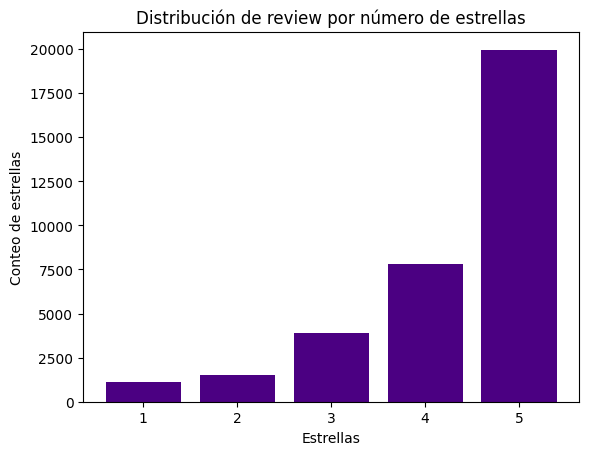

In [ ]:
# Gráfico de barras
plt.bar(count_overall.index, count_overall.values,color='indigo')

# Etiquetas y título
plt.xlabel('Estrellas')
plt.ylabel('Conteo de estrellas')
plt.title('Distribución de review por número de estrellas')

# Mostrar el gráfico
plt.show()

#### Separar las calificaciones en dos "positivas y negativas"

In [ ]:
# Marcamos con 1 los rating mayores a 3 y con 0 el resto

df_beauty['overall'] = np.where(df_beauty['overall'] > 4, 1, 0)
df_beauty['overall'].value_counts()

overall
1    19963
0    14302
Name: count, dtype: int64

#### Voy a tomar una muestra del df tomando en cuenta que dividí las calificaciones en 1 y cero

0 para las reseñas con estrellas 1, 2 y 3  
1 para las reseñas con estrellas 4 y 5


In [ ]:
# Calcular el número de muestras para cada clasificación
n_samples_0 = len(df_beauty[df_beauty['overall'] == 0]) // 2
n_samples_1 = len(df_beauty[df_beauty['overall'] == 1]) // 2

# Filtrar las reseñas con calificación 0 y 1
df_0 = df_beauty[df_beauty['overall'] == 0]
df_1 = df_beauty[df_beauty['overall'] == 1]

# Obtener muestras aleatorias balanceadas
sampled_df_0 = df_0.sample(n=n_samples_0, random_state=42)
sampled_df_1 = df_1.sample(n=n_samples_1, random_state=42)

# Concatenar las muestras para formar el DataFrame balanceado final
sample_df = pd.concat([sampled_df_0, sampled_df_1]).reset_index(drop=True)

# Información de la muestra tomada del df
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17132 entries, 0 to 17131
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     17132 non-null  int64 
 1   reviewText  17132 non-null  object
dtypes: int64(1), object(1)
memory usage: 267.8+ KB


In [ ]:
# Verificar las proporciones
print("Número de reviews negativas (de 1 a 3 estrellas) es de", len(sample_df[sample_df['overall'] == 0]))
print("Número de reviews positivas (de 4 a 5 estrellas) es de", len(sample_df[sample_df['overall'] == 1]))


Número de reviews negativas (de 1 a 3 estrellas) es de 7151
Número de reviews positivas (de 4 a 5 estrellas) es de 9981


In [ ]:
sample_df.shape

(17132, 2)

In [ ]:
sample_df.head()

,overall,reviewText
0,0,The color that comes out of this sunless tanne...
1,0,"I love this brand, but this one didn't work as..."
2,0,Smells ok. Not too strong.
3,0,I love and cherish my L'Occitane Shea Butter H...
4,0,The first time I used this was a telling momen...


In [ ]:
sample_df.to_csv('/content/drive/MyDrive/sample_beauty')

Graficar ahora las reseñas con la nueva distribución de reseñas positivas y negativas.

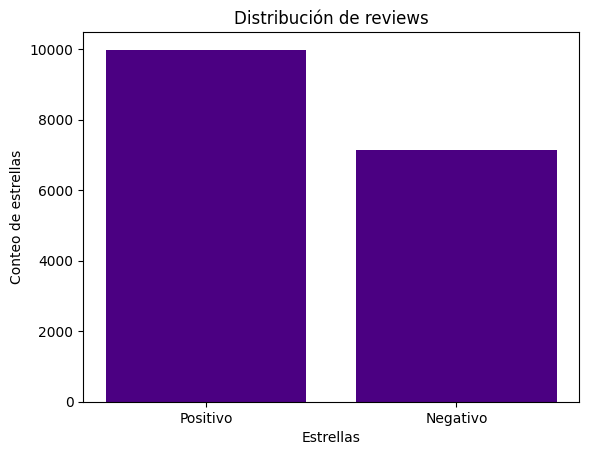

In [ ]:
# mostrar distribución grágica de las reseñas
plt.bar(["Positivo", "Negativo"],
        [sample_df[sample_df["overall"] == 1]["overall"].count(),
         sample_df[sample_df["overall"] == 0]["overall"].count()],color='indigo')

plt.xlabel('Estrellas')
plt.ylabel('Conteo de estrellas')
plt.title('Distribución de reviews')

plt.show()

#### Revisar la información sin procesar

In [ ]:
# Contar las palabras
tokens = (token for sentence in sample_df[["reviewText"]].values for token in sentence[0].split())
print("Palabras en total: {}\n".format(len(list(tokens))))

Palabras en total: 1558382



In [ ]:
from collections import Counter

# Convertir a minusculas y dividir palabras
sample_df2 = sample_df['reviewText'].str.lower().str.split()
# pasar a una serie de palabras
words = sample_df2.apply(pd.Series).stack().reset_index(drop = True)

# contar palabras
vocabulary_card = Counter(words)

# Imprimir la cardinalidad del vocabulario
print(f"Cardinalidad del Vocabulario: {len(vocabulary_card)}")

Cardinalidad del Vocabulario: 48555


### N-grams

In [ ]:
# Palarbas mas comunes
word_frequency = vocabulary_card.most_common(10)
word_frequency

[('the', 61245),
 ('i', 53830),
 ('a', 47481),
 ('and', 45102),
 ('it', 40523),
 ('to', 34681),
 ('this', 28579),
 ('is', 28521),
 ('my', 25466),
 ('of', 22115)]

#### 1-gram

#### al todavía no haber procesado las palabras es normal que se muestren las que no tienen valor para poder hacer un buen análisis

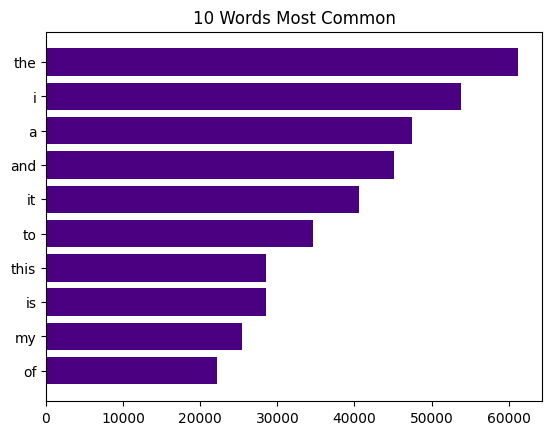

In [ ]:
# Graficar las palabras más comunes
gram1 = [w[0] for w in word_frequency]
gram1_freq = [w[1] for w in word_frequency]
gram1_freq, gram1 = zip(*sorted(zip(gram1_freq, gram1)))
plt.title("10 Words Most Common")
plt.barh(gram1, gram1_freq,color='indigo')
plt.show()


#### 2-grams

In [ ]:
# Para generar ngrams
from nltk import ngrams
# Calcular la frecuencia de elementos
from nltk.probability import FreqDist

# Generar diagramas pares
bigrams2 = ngrams(words, 2)
bigrams_freq_ = FreqDist(bigrams2)
bigrams_freq_.most_common(10)

[(('i', 'have'), 6089),
 (('it', 'is'), 4796),
 (('is', 'a'), 4790),
 (('this', 'is'), 4460),
 (('in', 'the'), 4194),
 (('of', 'the'), 4117),
 (('my', 'skin'), 3842),
 (('and', 'i'), 3247),
 (('on', 'my'), 2934),
 (('and', 'it'), 2801)]

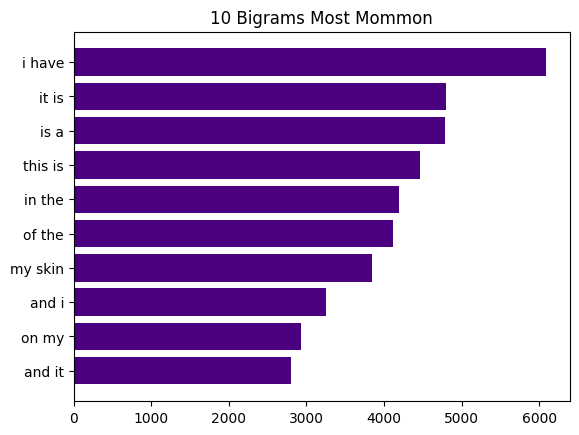

In [ ]:
gram1 = [" ".join(map(str, w1)) for w1,w2 in bigrams_freq_.most_common(10)]
gram1_freq = [w2 for w1,w2 in bigrams_freq_.most_common(10)]
gram1_freq, gram1 = zip(*sorted(zip(gram1_freq, gram1)))
plt.title("10 Bigrams Most Mommon")
plt.barh(gram1, gram1_freq, color='indigo')
plt.show()

#### 3-grams

In [ ]:
bigrams3 = ngrams(words, 3)
bigrams_freq_ = FreqDist(bigrams3)
bigrams_freq_.most_common(10)

[(('this', 'is', 'a'), 1728),
 (('a', 'lot', 'of'), 984),
 (('it', 'is', 'a'), 744),
 (('it', 'has', 'a'), 692),
 (('as', 'well', 'as'), 592),
 (('i', 'have', 'been'), 574),
 (('goes', 'a', 'long'), 521),
 (('i', 'love', 'the'), 521),
 (('this', 'is', 'the'), 486),
 (('i', 'have', 'used'), 468)]

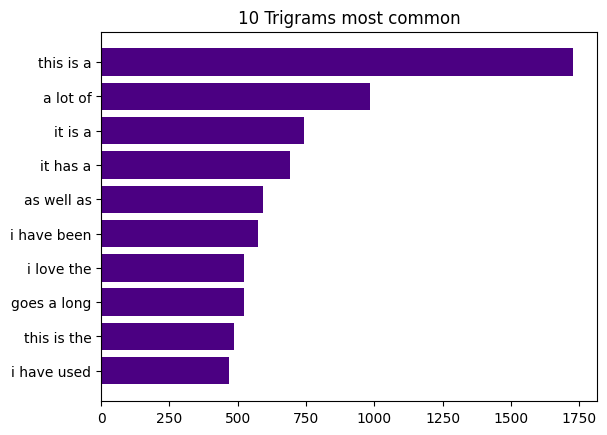

In [ ]:
trigrams_ = ngrams(words, 3)
trigrams_freq_ = FreqDist(trigrams_)
trigrams_freq_.most_common(10)
gram1 = [" ".join(map(str, w1)) for w1,w2 in trigrams_freq_.most_common(10)]
gram1_freq = [w2 for w1,w2 in bigrams_freq_.most_common(10)]
gram1_freq, gram1 = zip(*sorted(zip(gram1_freq, gram1)))
plt.title("10 Trigrams most common")
plt.barh(gram1, gram1_freq, color='indigo')
plt.show()

#### Word Cloud

In [ ]:
pip install wordcloud

In [ ]:
from wordcloud import WordCloud

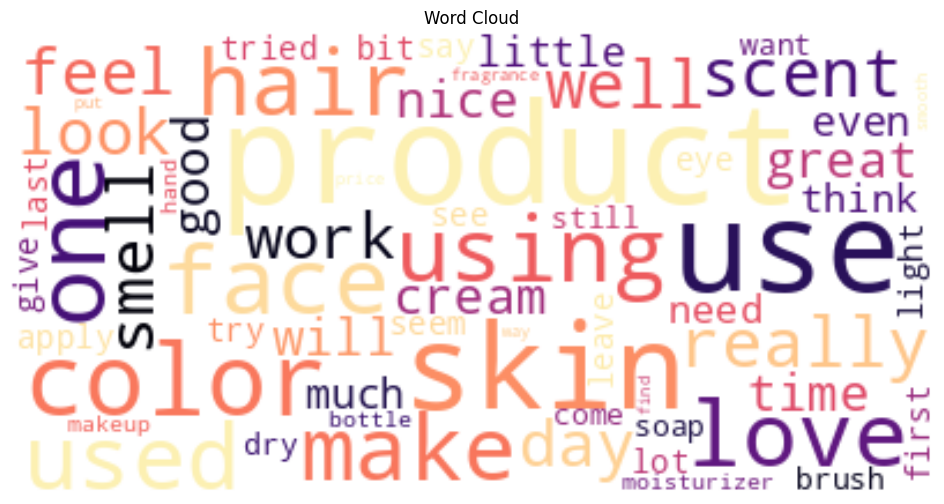

In [ ]:
# Concatenar todos los textos en una sola cadena
text = " ".join(sample_df['reviewText'])

# Crear un objeto WordCloud
wordcloud = WordCloud(max_font_size=60, max_words=60, background_color='white', colormap='magma').generate(text)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

#### Voy a realizar uno por reviews positivas y otro de negativas. Primero el de reviews positivas

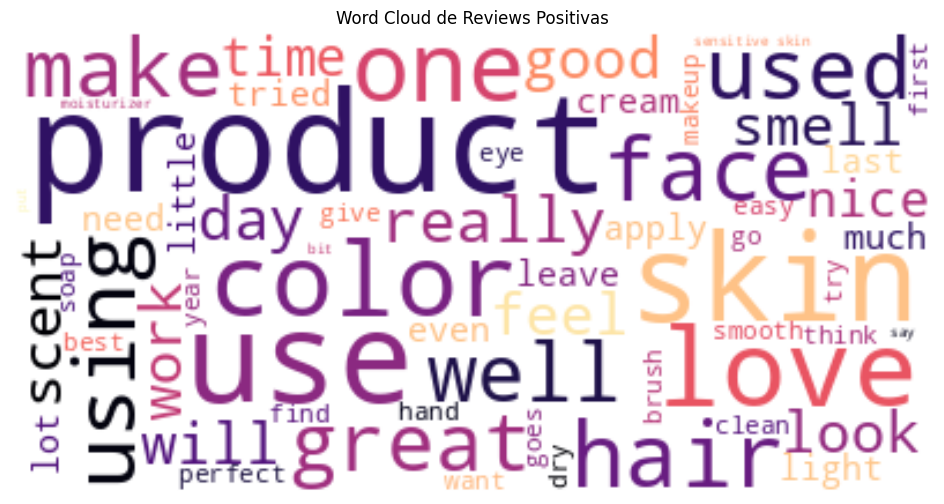

In [ ]:
# Filtrar solo los textos de las reviews con sentimiento negativo
positive_cloud = sample_df[sample_df['overall'] == 1]['reviewText'].str.cat(sep=' ')

# Crear un objeto WordCloud
wordcloud_positive = WordCloud(max_font_size=60, max_words=60, background_color='white', colormap='magma').generate(positive_cloud)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews Positivas')
plt.show()

wordcloud con reseñas negativas

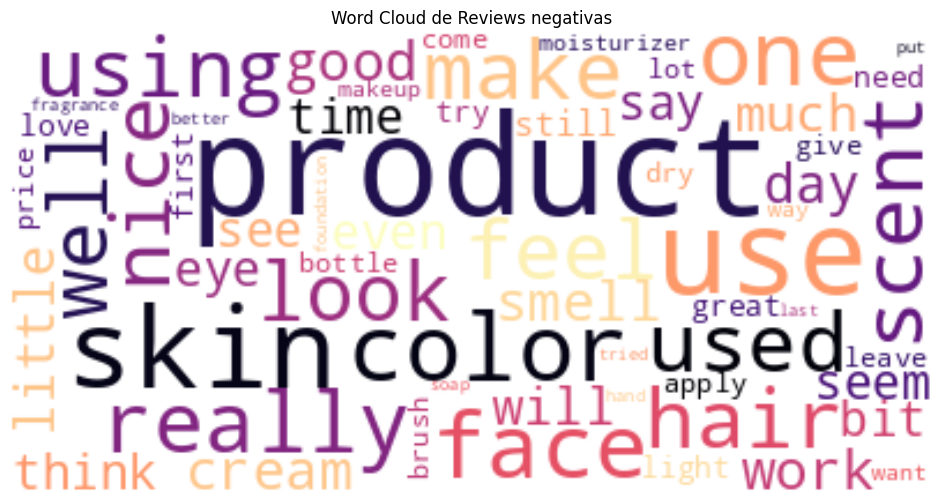

In [ ]:
negative_cloud = sample_df[sample_df['overall'] == 0]['reviewText'].str.cat(sep=' ')

# Crear un objeto WordCloud
wordcloud_negative = WordCloud(max_font_size=60, max_words=60, background_color='white', colormap='magma').generate(negative_cloud)

# Mostrar la gráfica
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud de Reviews negativas')
plt.show()

#### Word embeddings

Primero voy a realizar limpieza del df para poderlo trabajar

In [ ]:
# Para entrenar modelos de vectores de palabras
from gensim.models import Word2Vec
# Leer oraciones y alimentarlas al modelo word2vec
from gensim.models.word2vec import LineSentence
# Para trabajar con expresiones regulares
import re
# Tiempo de ejecución
from time import time
#  Para Frecuencias de palabras
# from collections import defaultdict

# Para procesar texto a lenguaje natural
import spacy
#Monitor de mensajes y registros
import logging
logging.basicConfig(format="%(levelname)s - %(asctime)s: %(message)s", datefmt= '%H:%M:%S', level=logging.INFO)
# procesamiento
from gensim.models.phrases import Phrases, Phraser

In [ ]:
# cargar modelo de spacy en inglés para procesar texto
nlp = spacy.load("en_core_web_sm")
def clean(doc):
    # tokenizar, excluir palabras sin valor
    txt = [token.lemma_ for token in doc if not token.is_stop]
    if len(txt) > 2:
        return ' '.join(txt)

In [ ]:
# Eliminar caracteres no deseados y convertir a minúsculas
to_clean = (re.sub("[^A-Za-z']+", ' ', str(row)).lower() for row in sample_df['reviewText'])

In [ ]:
#  Medir tiempo de ejecución
# Guardar el tiempo que tarda en ejecutar la limpieza
t = time()
# Procesar el texto en lotes
txt = [clean(doc) for doc in nlp.pipe(to_clean, batch_size=5000)]
# Calcular y mostrar el tiempo que tardo en limpiar
print('Tiempo para limpiar todo: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para limpiar todo: 3.86 mins


In [ ]:
# DF con texto limpio
df_clean = pd.DataFrame({'clean': txt})
# Quitar duplicados
df_clean = df_clean.dropna().drop_duplicates()
df_clean.shape

(12821, 1)

In [ ]:
df_clean.head(5)

,clean
0,color come sunless tanner incredible familiar ...
1,love brand work expect like perfect hair work ...
2,smell ok strong
3,love cherish l'occitane shea butter hand cream...
4,time telling moment teenage boy liberally appl...


In [ ]:
# entrenamos con Word2Vec
import multiprocessing
from gensim.models import Word2Vec

In [ ]:
cores = multiprocessing.cpu_count() # Contamos el número de cores en el ordenador
print (cores)

2


In [ ]:
# Hyperparametros
w2v_model = Word2Vec(min_count=20,
                     window=2,
                     vector_size=300,
                     sample=6e-5,
                     alpha=0.01,
                     min_alpha=0.0007,
                     negative=20,
                     workers=cores-1)

In [ ]:
# construir el vocabulario
t = time()
sent = [row.split() for row in df_clean['clean']]
w2v_model.build_vocab(sent, progress_per=10000)
# Medir el tiempo
print('Tiempo para construir el vocabulario: {} mins'.format(round((time() - t) / 60, 2)))

Tiempo para construir el vocabulario: 0.0 mins


In [ ]:
print('Vocabulario compuesto por {} palabras'.format(len(w2v_model.wv.key_to_index)))

Vocabulario compuesto por 2553 palabras


In [ ]:
# entrenar el modelo Word2Vec
t = time()
w2v_model.train(sent, total_examples=w2v_model.corpus_count, epochs=30, report_delay=1)
print('Time to train the model: {} mins'.format(round((time() - t) / 60, 2)))

Time to train the model: 0.72 mins


In [ ]:
# Guardar el modelo
w2v_model.save('./w2v_model.pkl') # guardamos el modelo

In [ ]:
# Verificar y Crear Directorio
import os
os.makedirs('/content/drive/MyDrive', exist_ok=True)

In [ ]:
# Hacer una copia del modelo en drive
!cp w2v_model.pkl /content/drive/MyDrive/w2v_model.pkl

In [ ]:
# Cargar el modelo
w2v_sg = Word2Vec.load('./w2v_model.pkl')

In [ ]:
# Definir palabras clave
keys = ['hair', 'skin', 'face', 'cream', 'scent','makeup']

# Obtener palabras similares y embeddings
embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in w2v_sg.wv.most_similar(word, topn=10):
        words.append(similar_word)
        embeddings.append(w2v_sg.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)


In [ ]:
# Mostrar palabras similares
print(word_clusters)

[['curly', 'frizzy', 'wavy', 'blow', 'frizz', 'volume', 'weigh', 'straight', 'length', 'tangle'], ['irritate', 'combination', 'moisturize', 'sensitive', 'oily', 'breakout', 'moisturizing', 'rosacea', 'patch', 'moisturizer'], ['refresh', 'thoroughly', 'dirt', 'ste', 'night', 'morning', 'gently', 'moisturize', 'irritated', 'irritate'], ['moisturizer', 'moisturizing', 'night', 'hydrate', 'cleanse', 'exfoliate', 'facial', 'toner', 'hydration', 'mask'], ['overpower', 'overwhelming', 'smell', 'flowery', 'linger', 'strong', 'masculine', 'aroma', 'pleasant', 'floral'], ['waterproof', 'primer', 'foundation', 'eyeliner', 'remover', 'blender', 'liquid', 'apply', 'cc', 'swipe']]


In [ ]:
# Reducción de dimensionalidad
from sklearn.manifold import TSNE

In [ ]:
# Reducir dimensionalidad de embeddings
tsne_model_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=42)

In [ ]:
# convertir cluster a array
embedding_clusters = np.array(embedding_clusters)
# dimensiones del array
n, m, k = embedding_clusters.shape

In [ ]:
# Aplicar TSNE a embeddings, aplana el array a 2D
embeddings_2d = np.array(tsne_model_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

In [ ]:
# Para colores en gráficas colormaps
import matplotlib.cm as cm
# Para mostrar gráficos en línea
%matplotlib inline

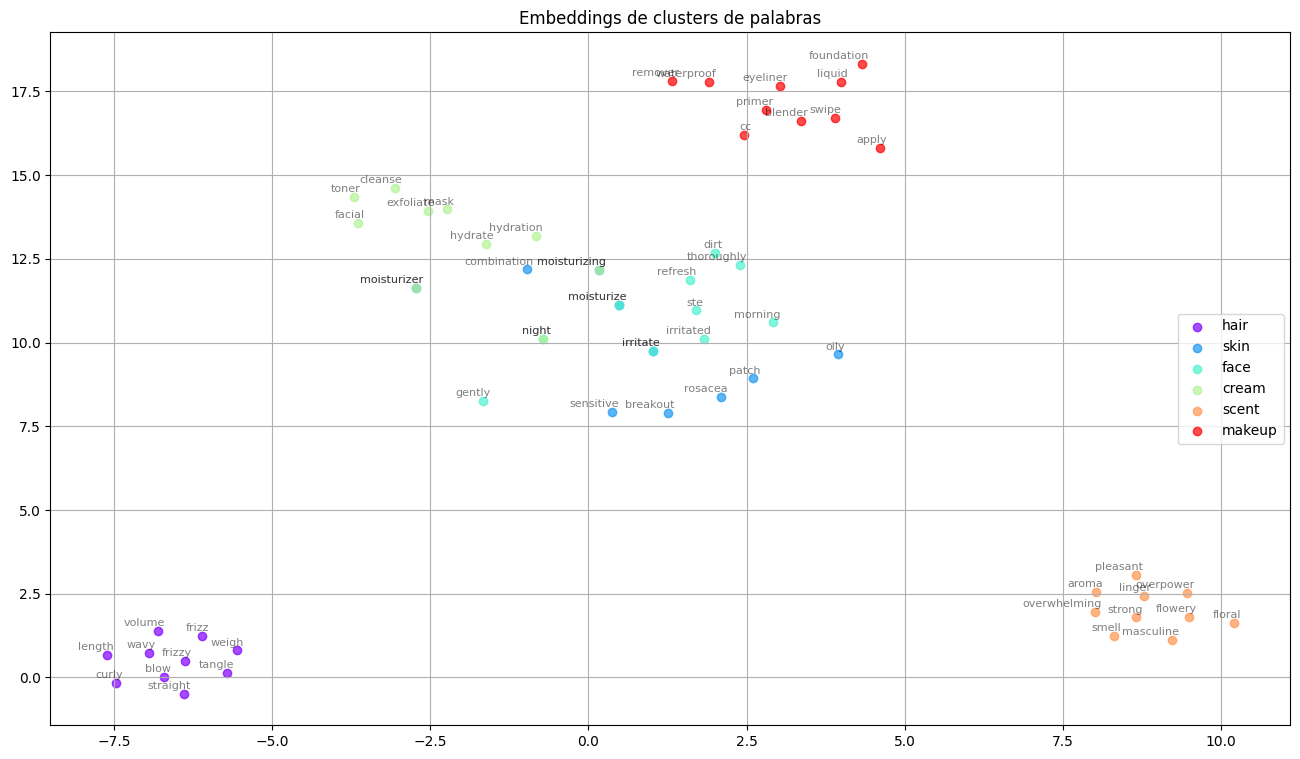

In [ ]:
# visualización
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:,0]
        y = embeddings[:,1]
        plt.scatter(x, y, c=[color], alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=7)
    plt.grid(True)
    plt.title('Embeddings de clusters de palabras')
    # plt.savefig("f/г.png", format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words(keys, embeddings_2d, word_clusters)

En la visualización se entiende bien la semántica de las palabras usadas como key y las que son similares. Las palabras que están relacionadas con temas específicos se encuentran juntas y las que son de diferente temática se observa distanciamiento entre ellas, por ejemplo la palabra hair (color morado) en posición de makeup(rojo) se encuentran distanciadas.
en cuanto a skin y face que son parte de lo mismo se encuentras relacionadas con las palabras utilizadas

#### Ley de Zipf

In [ ]:
from nltk.probability import FreqDist

In [ ]:
splitted_reviews = sample_df['reviewText'].str.lower().str.split()
words_zipf = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

In [ ]:
fd = FreqDist(words_zipf)
fd = {k: v for k, v in sorted(fd.items(), key=lambda item: item[1], reverse=True)}

In [ ]:
ranks = list()
freqs = list()

for rank, word in enumerate(fd):
    ranks.append(rank+1)
    freqs.append(fd[word])

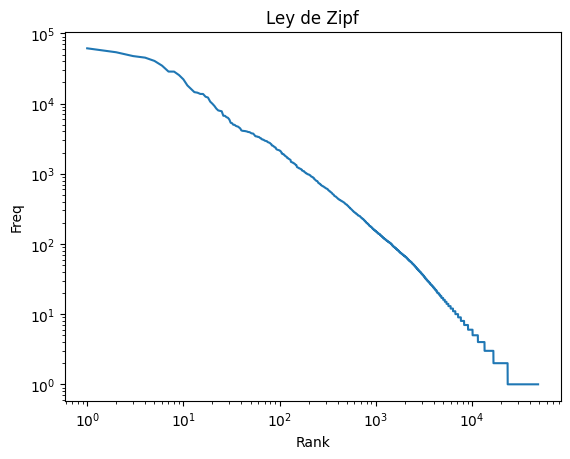

In [ ]:
plt.loglog(ranks, freqs)
plt.xlabel('Rank')
plt.ylabel('Freq')
plt.title('Ley de Zipf')
plt.show()
